<a href="https://colab.research.google.com/github/tristanreshef13/Data-Analysis-Portfolio/blob/main/_%D7%98%D7%A8%D7%99%D7%A1%D7%98%D7%90%D7%9F_%D7%A8%D7%A9%D7%A3_%D7%A0%D7%99%D7%AA%D7%95%D7%97_%D7%91%D7%99%D7%A7%D7%95%D7%A8%D7%95%D7%AA_%D7%9E%D7%9C%D7%95%D7%A0%D7%95%D7%AA_%D7%95%D7%94%D7%A4%D7%A7%D7%AA_%D7%AA%D7%95%D7%91%D7%A0%D7%95%D7%AA_%D7%A2%D7%9C_%D7%99%D7%95%D7%A7%D7%A8%D7%AA%D7%99%D7%95%D7%AA_%D7%94%D7%9E%D7%9C%D7%95%D7%9F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div dir="rtl">

# **ניתוח ביקורות מלונות והפקת תובנות על יוקרתיות המלון**

### **תיאור הפרויקט**  
פרויקט זה בוצע במסגרת הקורס **"ניתוח נתונים בפייתון"**, ומטרתו הייתה לנתח מאגר נתונים של ביקורות מלונות כדי להבין מהם **הגורמים המרכזיים שמאפיינים מלון יוקרתי**.

### **שלבי הניתוח**  
- **עיבוד נתונים (Data Cleaning)** – טיפול בערכים חסרים, הסרת כפילויות והכנת הנתונים לניתוח.  
- **ניתוח סטטיסטי** – חקר הקשרים בין דירוגים, ביקורות, ומאפייני המלון.  
- **ויזואליזציה של נתונים** – יצירת גרפים להצגת התובנות המרכזיות.  
- **Machine Learning[link text](https://)** – בניית מודל לניבוי יוקרתיות המלון על סמך מאפייניו.

### **קבצים מצורפים**  
- **הוראות העבודה** – פירוט הדרישות המקוריות של הפרויקט.  
- **מאגר הנתונים (CSV)** – מידע על ביקורות ודירוגים של מלונות.  
- **Notebook זה** – כולל את כל שלבי הניתוח, הקוד והמסקנות.

**הערה:** בפרויקט זה הרחבתי את הניתוח מעבר לדרישות המקוריות והוספתי אלמנטים מתקדמים להסקת מסקנות מבוססות נתונים.

</div>


# יבוא קבצים והגדרות


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# התקנת הספריות הדרושות
!pip install tabula-py
!apt-get install -y openjdk-11-jdk
from tabula import read_pdf
from google.colab import files

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 50.7 MB/s eta 0:00:00
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fonts-dejavu-core fonts-dejavu-extra libatk-wrapper-java libatk-wrapper-java-jni libfontenc1
  libice-dev libsm-dev libxkbfile1 libxt-dev libxtst6 libxxf86dga1 openjdk-11-jre x11-utils
Suggested packages:
  libice-doc libsm-doc libxt-doc openjdk-11-demo openjdk-11-source visualvm mesa-utils
The following NEW packages will be installed:
  fonts-dejavu-core fonts-dejavu-extra libatk-wrapper-java libatk-wrapper-java-jni libfontenc1
  libice-dev libsm-dev libxkbfile1 libxt-dev libxtst6 libxxf86dga1 openjdk-11-jdk openjdk-11-jre
  x11-utils
0 upgraded, 14 newly installed, 0 to remove and 20 not upgraded.
Need to get 5,522 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 fon

In [ ]:
file1='/content/drive/MyDrive/Hotel_Reviews (2).csv'
#הגדרת כל המשתנים עבור כל הרצה מחדש של הקוד על מנת לשמור על הסדר
og_file=pd.read_csv(file1, sep=';') #שמירת הקובץ המקורי
df = pd.read_csv(file1, sep=';') #שמירת הקובץ לעבודה שוטפת
df = df.reset_index(drop=True) #כל פעם שנריץ את הקוד אנחנו נאפס את האינדקס הקודם ונכין אינדקס חדש
df1=df #נגדיר משתנה לאחר שינויים
df_clean=df1 #משתנה לאחר ניקויים עבור רגרסיה


In [ ]:
#נסתכל על הדאטה הראשוני
df.head(7)


,hotel_name,location,price,review_date,rating,is_luxury_hotel,review,distance_from_city_center,check_in_time,check_out_time,number_of_rooms,availability,rating_from_guests,hotel_facilities,label
0,Seaside Luxury Suites,New York,250.51,2024-02-07,5,1,Very disappointing stay at Seaside Luxury Suit...,3051,13:0,10:30,43,1,4.4,"Wi-Fi, Restaurant, Air Conditioning, Gym, Swim...",1
1,Ocean Breeze Resort,Tel Aviv,207.43,2024-08-23,5,1,Stay at Ocean Breeze Resort in Tel Aviv was ok...,1839,12:45,11:0,114,0,4.9,"Free Parking, Spa, Restaurant, Gym, Air Condit...",1
2,Mountain View Inn,Berlin,249.67,2024-08-20,5,1,Very disappointing stay at Mountain View Inn i...,4934,15:0,10:0,152,0,3.1,"Restaurant, Free Parking, Swimming Pool, Spa, ...",1
3,Heritage Grand Hotel,Rome,427.39,2024-01-01,3,1,Had an amazing stay at Heritage Grand Hotel in...,2093,14:0,11:0,55,1,4.6,"Free Parking, Wi-Fi, Restaurant, Swimming Pool...",0
4,Sunset Beach Resort,Berlin,347.75,2024-10-24,1,1,Stay at Sunset Beach Resort in Berlin was okay...,3592,12:0,11:0,188,1,4.1,"Spa, Swimming Pool, Wi-Fi, Restaurant, Free Pa...",0
5,Imperial Heights Hotel,Rome,308.95,2024-07-19,5,1,Very disappointing stay at Imperial Heights Ho...,4426,13:30,11:0,91,0,4.5,"Spa, Air Conditioning, Gym",1
6,Royal Park Hotel,Paris,426.12,2024-07-16,1,1,Very disappointing stay at Royal Park Hotel in...,1742,12:0,11:30,147,0,4.6,"Restaurant, Gym, Wi-Fi, Swimming Pool, Free Pa...",0


In [ ]:
og_file.info()  #נבדוק כמה טורים ועמודות יש בדאטה שלנו ומה סוגי המשתנים

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812 entries, 0 to 811
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   hotel_name                 812 non-null    object 
 1   location                   812 non-null    object 
 2   price                      812 non-null    float64
 3   review_date                812 non-null    object 
 4   rating                     812 non-null    int64  
 5   is_luxury_hotel            812 non-null    int64  
 6   review                     812 non-null    object 
 7   distance_from_city_center  812 non-null    int64  
 8   check_in_time              812 non-null    object 
 9   check_out_time             812 non-null    object 
 10  number_of_rooms            812 non-null    int64  
 11  availability               812 non-null    int64  
 12  rating_from_guests         812 non-null    float64
 13  hotel_facilities           812 non-null    object 

<div dir="rtl" align="right">

**מס' טורים:** `15`  
**מס' תצפיות:** `812`  
**סוגי משתנים:** `float`, `int`, `object`  

**משמעות כל טור:**  
- `name_hotel` : מחרוזת  
- `location` : מחרוזת  
- `price` : מספר עשרוני  
- `REVIEW_DATE` : מחרוזת  
- `RATING` : מספר שלם  
- `is_luxury_hotel` : בוליאני  (1 = כן מלון יוקרה, 0 = לא מלון יוקרה)
- `review` : מחרוזת  
- `distance_from_city_center` : מספר שלם  
- `check_in_time` : מחרוזת  
- `check_out_time` : מחרוזת  
- `number_of_rooms` : מספר שלם  
- `availability` : בוליאני  
- `hotel_facilities` : מחרוזת  
- `rating_from_guests` : מספר עשרוני  
- `label` : בוליאני  (1 = מלון יוקרה שדורג מעל 3 (לא כולל), 0 = מלונות לא יוקרתיים או מלון שדורג 1-3)

כל תצפית מכילה את כל הפרטים מעלה : שם המלון, המיקום, מחיר וכו'.  
לפי סקירת הדאטה למטה - ניתן לראות כי אין נתונים חסרים בתצפיות.
</div>


# סקירת הדאטה

In [ ]:
missing_values = df.isna().sum()
print("Number of missing values in each column:")
print(missing_values)

Number of missing values in each column:
hotel_name                   0
location                     0
price                        0
review_date                  0
rating                       0
is_luxury_hotel              0
review                       0
distance_from_city_center    0
check_in_time                0
check_out_time               0
number_of_rooms              0
availability                 0
rating_from_guests           0
hotel_facilities             0
label                        0
dtype: int64


<div dir='rtl'>

# **שאלת מחקר**  
כיצד המשתנים השונים משפיעים על ההסתברות שמלון יהיה **יוקרתי או לא יוקרתי**?  
איך נגדיר **יוקרה**, ומה יהיה המשתנה המוסבר עבור יוקרה ברגרסיה לוגיסטית?  

---

## **שאלות סקירה**  

### **1. מה כל תצפית מייצגת?**  
- האם כל שורה מייצגת **ביקורת בודדת** או מידע על **מלון שלם**?  
- כמה **מלונות ייחודיים** מופיעים בנתונים?  
- האם ניתן להסיק **תובנות על המלונות עצמם** ולא רק על הביקורות?  

### **2. מה משמעות הדירוגים וכיצד הם קשורים לניתוח?**  
- אילו סוגי דירוגים מופיעים בנתונים?  
- האם הדירוגים הללו משקפים **יוקרה** של המלון או רק את חוויית האירוח?  

### **3. אילו מתקנים קיימים במלונות וכיצד הם קשורים ליוקרה או למיקום?**  
- האם קיימים **הבדלים בין מתקני מלונות יוקרתיים למלונות שאינם יוקרתיים**?  
- האם **המיקום הגיאוגרפי משפיע על סוגי המתקנים** שהמלונות מציעים?  

---

</div>


<div dir='rtl'>

# **לקרוא לאחר סקירת הקוד – תשובות לשאלות הסקירה**  

## **1. מבנה הנתונים ותובנות כלליות**  
- כל תצפית בנתונים מייצגת **ביקורת בודדת על מלון**.  
- המלונות משתייכים **לאחת מ-15 רשתות שונות** ונמצאים **באחד מ-8 מיקומים אפשריים**.  
- בסך הכול קיימים **91 מלונות שונים** בנתונים.  

**האם ניתן להסיק תובנות ישירות על המלונות?**  
- **לא ניתן להפיק תובנות משמעותיות מתוך תוכן הביקורות עצמן**, אלא רק מתוך יתר המשתנים בטבלה.  
- **מספר הביקורות פר מלון נמוך יחסית** – בסך הכול **812 ביקורות (ולאחר הסרת כפילויות נותרו 188 ביקורות בלבד) עבור 91 מלונות**, מה שמגביל את המידע הזמין.  
- עם זאת, ניתן להסיק תובנות **על משתנים נוספים**, כמו **מתקנים ודירוגים כלליים של המלון**, שאינם תלויים בתוכן הביקורות עצמן.  

---

## **2. הבנת הדירוגים ויחסם ליוקרה**  

**הנתונים מכילים שני סוגי דירוגים:**  

- **"דירוג אורחים"** – דירוג קבוע **לכל מלון**, ככל הנראה מבוסס על ממוצע של מספר ביקורות ונלקח **ישירות מהאתר**.  
- **"דירוג ביקורת"** – דירוג שמשתנה **בין ביקורת לביקורת**, ולכן משקף **את ההערכה האישית של כל מבקר בודד**.  

**בהתבסס על כך:**  
- **"דירוג אורחים" מייצג את הדירוג הכללי של המלון בפועל**.  
- **"דירוג ביקורת" מבטא את חוות הדעת של כל מבקר באופן אישי**.  

---

## **3.הקשר בין מתקני המלון לרגשות האורחים**  
ביצענו **חקר חופשי** של הקשרים בין מתקני המלון לבין רגשות האורחים כפי שבאו לידי ביטוי בביקורות.  
בנוסף, ניתחנו **סטטיסטיקות כלליות וגרפים** שונים כדי להבין מגמות מרכזיות.  
המסקנות המרכזיות מפורטות מתחת לגרפים המצורפים.  

</div>


In [ ]:
#רוצים לבדוק כמה מלונות יש לנו והאם מלון אחד חוזר פעמיים
print(df['hotel_name'].describe())
#יש 15 רשתות של מלונות


count                   812
unique                   15
top       Mountain View Inn
freq                     87
Name: hotel_name, dtype: object


In [ ]:
og_file['location'].describe()
#יש לנו דאטה על מלונות ב8 לוקיישינים שונים

,location
count,812
unique,8
top,Tel Aviv
freq,146


In [ ]:
#פקודה שנעזרנו בה בצאט שעוזרת למצוא מספר יחודיים בדרך קצרה
num_unique_combinations = og_file.groupby(['location', 'hotel_name']).ngroups
print(num_unique_combinations)
#יש לנו 91 מלונות שונים בדאטה


91


In [ ]:
#אנחנו חושדות שיש לנו תצפיות כפולות שעלולות להטות את הדאטה
df_sorted = df.sort_values(by=['location', 'hotel_name'])
df_sorted.head()
#מבינות כאן שיש תצפיות כפולות של אותה הביקורת בדיוק

,hotel_name,location,price,review_date,rating,is_luxury_hotel,review,distance_from_city_center,check_in_time,check_out_time,number_of_rooms,availability,rating_from_guests,hotel_facilities,label
106,Blue Lagoon Resort,Berlin,479.90,2024-04-10,3,0,Stay at Blue Lagoon Resort in Berlin was okay....,3319,15:45,11:0,120,1,4.3,"Spa, Swimming Pool, Restaurant, Gym, Air Condi...",0
294,Blue Lagoon Resort,Berlin,479.90,2024-04-10,3,0,Stay at Blue Lagoon Resort in Berlin was okay....,3319,15:45,11:0,120,1,4.3,"Spa, Swimming Pool, Restaurant, Gym, Air Condi...",0
482,Blue Lagoon Resort,Berlin,479.90,2024-04-10,3,0,Stay at Blue Lagoon Resort in Berlin was okay....,3319,15:45,11:0,120,1,4.3,"Spa, Swimming Pool, Restaurant, Gym, Air Condi...",0
670,Blue Lagoon Resort,Berlin,479.90,2024-04-10,3,0,Stay at Blue Lagoon Resort in Berlin was okay....,3319,15:45,11:0,120,1,4.3,"Spa, Swimming Pool, Restaurant, Gym, Air Condi...",0
122,Crystal Waters Resort,Berlin,199.61,2024-05-11,4,0,Had an amazing stay at Crystal Waters Resort i...,2068,15:0,11:30,138,1,4.3,"Swimming Pool, Spa, Free Parking, Wi-Fi",0


In [ ]:
# כמה מלונות יש בכל עיר מכל רשת מלונות?וכמה ביקורת(תצפיות) יש לכל אחד
og_file.groupby(['location', 'hotel_name']).size()


location  hotel_name            
Berlin    Blue Lagoon Resort         4
          Crystal Waters Resort      4
          Golden Sands Resort        4
          Imperial Heights Hotel     4
          Luxe Hotel & Spa           8
                                    ..
Tel Aviv  Seaside Luxury Suites      4
          Skyline Retreat           12
          Sunset Beach Resort        8
          The Grand Palace           8
          Urban Escape Hotel         5
Length: 91, dtype: int64

In [ ]:
# ספירת שכפולים מדויקים
duplicate_counts = og_file.value_counts()

# הצגת רק השורות שחוזרות יותר מפעם אחת
true_duplicates = duplicate_counts[duplicate_counts > 1]

# הצגת כמות השכפולים האמיתיים
print(f"מספר השורות שחוזרות יותר מפעם אחת: {true_duplicates.shape[0]}")

מספר השורות שחוזרות יותר מפעם אחת: 188


In [ ]:
#נוריד מהדאטה את הביקורות הזהות המשוכפלות
df.drop_duplicates(inplace=True)


In [ ]:
#נחקור מחדש את הדאטה המעודכן
df.info()
df.describe()
# הפעלת describe רק על עמודות לא מספריות
df.describe(include=['object'])

<class 'pandas.core.frame.DataFrame'>
Index: 188 entries, 0 to 187
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   hotel_name                 188 non-null    object 
 1   location                   188 non-null    object 
 2   price                      188 non-null    float64
 3   review_date                188 non-null    object 
 4   rating                     188 non-null    int64  
 5   is_luxury_hotel            188 non-null    int64  
 6   review                     188 non-null    object 
 7   distance_from_city_center  188 non-null    int64  
 8   check_in_time              188 non-null    object 
 9   check_out_time             188 non-null    object 
 10  number_of_rooms            188 non-null    int64  
 11  availability               188 non-null    int64  
 12  rating_from_guests         188 non-null    float64
 13  hotel_facilities           188 non-null    object 
 14 

,hotel_name,location,review_date,review,check_in_time,check_out_time,hotel_facilities
count,188,188,188,188,188,188,188
unique,15,8,144,146,12,4,180
top,Mountain View Inn,Tel Aviv,2024-12-03,Stay at Heritage Grand Hotel in Tel Aviv was o...,15:45,10:30,"Free Parking, Spa, Gym, Air Conditioning, Swim..."
freq,20,34,3,4,22,51,2


In [ ]:
#עכשיו אם יש לנו ביקורות על אותם מלונות  הן שונות
df_sorted = df.sort_values(by=['hotel_name', 'location'])
df_sorted.head(20)


,hotel_name,location,price,review_date,rating,is_luxury_hotel,review,distance_from_city_center,check_in_time,check_out_time,number_of_rooms,availability,rating_from_guests,hotel_facilities,label
106,Blue Lagoon Resort,Berlin,479.90,2024-04-10,3,0,Stay at Blue Lagoon Resort in Berlin was okay....,3319,15:45,11:0,120,1,4.3,"Spa, Swimming Pool, Restaurant, Gym, Air Condi...",0
175,Blue Lagoon Resort,Dubai,300.51,2024-11-13,5,0,Very disappointing stay at Blue Lagoon Resort ...,1839,15:0,10:0,142,1,4.5,"Air Conditioning, Wi-Fi, Free Parking, Gym",0
30,Blue Lagoon Resort,New York,456.01,2024-07-12,1,1,Very disappointing stay at Blue Lagoon Resort ...,2003,12:0,10:0,48,1,3.2,"Gym, Air Conditioning, Free Parking, Spa, Wi-Fi",0
132,Blue Lagoon Resort,New York,55.36,2024-07-01,5,0,Had an amazing stay at Blue Lagoon Resort in N...,1507,14:0,11:30,173,1,3.2,"Wi-Fi, Restaurant, Swimming Pool, Air Conditio...",0
43,Blue Lagoon Resort,Paris,370.33,2024-06-03,2,1,Very disappointing stay at Blue Lagoon Resort ...,2960,13:45,10:30,70,0,3.1,"Free Parking, Wi-Fi, Swimming Pool, Air Condit...",0
94,Blue Lagoon Resort,Paris,409.52,2024-12-21,2,0,Stay at Blue Lagoon Resort in Paris was okay. ...,1531,12:45,11:30,174,1,4.1,"Free Parking, Swimming Pool, Spa, Gym, Wi-Fi, ...",0
130,Blue Lagoon Resort,Paris,185.17,2024-01-08,4,0,Very disappointing stay at Blue Lagoon Resort ...,2911,14:30,10:0,44,1,4.1,"Wi-Fi, Spa, Swimming Pool, Gym",0
181,Blue Lagoon Resort,Paris,239.87,2024-02-12,4,0,Had an amazing stay at Blue Lagoon Resort in P...,3876,13:30,10:0,79,1,4.6,"Free Parking, Air Conditioning, Swimming Pool",0
35,Blue Lagoon Resort,Rome,109.28,2024-04-05,2,1,Very disappointing stay at Blue Lagoon Resort ...,1633,13:0,10:30,75,0,4.8,"Gym, Restaurant, Air Conditioning, Spa, Free P...",0
24,Blue Lagoon Resort,Tel Aviv,291.14,2024-02-04,3,1,Had an amazing stay at Blue Lagoon Resort in T...,517,13:0,11:0,140,1,4.1,"Restaurant, Wi-Fi, Air Conditioning, Free Park...",0


In [ ]:
#נחקור את הרייטינג
df_sorted = df.sort_values(by="rating", ascending=True)
print(df_sorted.head())
df_sorted = df.sort_values(by="rating_from_guests", ascending=True)
print(df_sorted.head())


                 hotel_name  location   price review_date  rating  \
93      Sunset Beach Resort    Berlin  128.14  2024-03-23       1   
109        Royal Park Hotel     Dubai  129.24  2024-11-10       1   
108  Imperial Heights Hotel  Tel Aviv  293.65  2024-09-19       1   
27       Urban Escape Hotel  Tel Aviv  444.64  2024-02-06       1   
107       Mountain View Inn  New York  112.19  2024-05-25       1   

     is_luxury_hotel                                             review  \
93                 1  Had an amazing stay at Sunset Beach Resort in ...   
109                0  Stay at Royal Park Hotel in Dubai was okay. Th...   
108                0  Had an amazing stay at Imperial Heights Hotel ...   
27                 1  Stay at Urban Escape Hotel in Tel Aviv was oka...   
107                0  Stay at Mountain View Inn in New York was okay...   

     distance_from_city_center check_in_time check_out_time  number_of_rooms  \
93                        3111         12:30          

<div dir='rtl'>

# **ניתוח הנתונים והבנת הדירוגים**  

במסגרת בחינת הנתונים, זיהינו הבחנה חשובה בין שני סוגי דירוגים:  

- **דירוג ביקורת** – משקף את **הדירוג האישי שניתן בכל ביקורת בודדת**, ועשוי **להשתנות מביקורת לביקורת** עבור אותו מלון.  
- **דירוג אורחים** – מהווה **מדד קבוע לכל מלון**, והוא נתון רציף, מה שעשוי להעיד כי מדובר **בממוצע של מספר ביקורות** ולא בדירוג יחידני.  

### **הגדרת הדירוגים לצורך הניתוח:**  
- **"דירוג ביקורת"** – הדירוג הספציפי שניתן במסגרת כל ביקורת.  
- **"דירוג אורחים"** – הדירוג הכללי המייצג את המלון בפועל.  

### **החלטה בנוגע לשימוש בדירוגים:**  
בהתחשב בכך שמספר הביקורות על כל מלון **נמוך יחסית**, ובהתאם לתובנה כי דירוג הביקורת מייצג חוות דעת פרטנית ולא מידע אינטגרטיבי,  
הוחלט **להסיר את דירוג הביקורת** מהניתוח.  

ההחלטה מתבססת על כך שהדירוג האישי בכל ביקורת אינו מספק מידע יציב או מייצג, במיוחד לאחר הסרת כפילויות, אך גם קודם לכן.  

</div>


<div dir='rtl'>

# **בחינת דירוגי מלונות יוקרתיים וקביעת מדד חדש**  

בתצפיות שלנו, זיהינו **מלונות שמסומנים כיוקרתיים**, אך יש להם:  
- **דירוג ספציפי של מינימום 1**  
- **דירוג אורחים של מינימום 3**  

לכאורה, דירוגים אלו **אינם תואמים** את ההגדרה של מלון יוקרתי.  

כדי ליצור מדד **אמין יותר**, אנו ננקוט בגישה הבאה:  
- **נתעלם מהביקורות הספציפיות** (כפי שכבר ציינו), כיוון שאין מהן מספיק נתונים.  
- **נבחר להתייחס רק לביקורות אורחים**, כיוון שהן מייצגות **ממוצע של מספר ביקורות**.  
- **נסנן רק מלונות בעלי דירוג אורחים של 4 ומעלה** – ולא כאלו שקיבלו דירוג של 3.  

גישה זו תאפשר לנו לזהות **באופן מדויק יותר** אילו מלונות אכן נחשבים **יוקרתיים**.  

</div>


<div dir='rtl'>

# **השוואת משתנה "לייבל" הקיים לנתון מבוסס דירוג אורחים**  

בנתונים שקיבלנו, כבר קיים **משתנה "לייבל"** שמטרתו להגדיר האם מלון נחשב **יוקרתי או לא**.  
עם זאת, אנו **חושדות** כי המשתנה הזה **מבוסס על הדירוג הספציפי של הביקורת (התצפית) עצמה**,  
ולא על **דירוג אורחים**, שהוא המייצג את הדירוג הרווח והמשפיע.  

### **מדוע דירוג אורחים עדיף?**  
- **דירוג אורחים** משכלל **מספר רב של ביקורות** באתר, ואין לנו גישה ישירה לכל הביקורות הללו.  
- **דירוג ספציפי** של ביקורת בודדת אינו בהכרח משקף את מצב המלון הכללי.  

לכן, **ניצור משתנה "לייבל" חדש** שיתבסס **על ביקורות אורחים בלבד**,  
ולא על דירוגי ביקורות בודדות, ונשווה בין השניים.  

### **מטרת המשתנה החדש**  
המטרה היא **להגדיר יוקרה בצורה מדויקת יותר** בהשוואה למשתנה `hotel_is_luxury`,  
כך שנוכל **לבחון קשרים אמיתיים בין משתנים שונים לבין יוקרת המלון**.  

</div>


<div dir='rtl'>

**הגדרת המשתנה הבינארי `label_2`**  

המשתנה **`label_2`** הוא משתנה בינארי שמטרתו לסמן **האם דירוג האורחים של המלון גבוה או שווה ל-4**,  
והוא מחושב **רק עבור רשומות שבהן `is_luxury_hotel == True`**.  

הוא מוגדר באופן הבא:  

- **1 (אמת)** → אם **דירוג האורחים גדול או שווה ל-4**, ורשומת המלון מסומנת כיוקרתית (`is_luxury_hotel == True`).  
- **0 (שקר)** → אם **דירוג האורחים קטן מ-4**, או אם המלון **אינו מסומן כיוקרתי** (`is_luxury_hotel == False`).  

### **מטרת המשתנה**  
`label_2` משמש כאינדיקטור לאיכות המלון **בתוך קבוצת המלונות שסומנו כיוקרתיים** (`is_luxury_hotel == True`),  
בהתבסס על דירוג האורחים, שהוא ממוצע חוות דעת מצטבר.  

</div>



In [ ]:
# יצירת משתנה label_2: 1 אם המלון יוקרתי ויש לו דירוג אורחים מעל גדול שווה ל4, אחרת 0
df['label_2'] = ((df['is_luxury_hotel'] == 1) & (df['rating_from_guests'] >= 4)).astype(int)

# הצגת דוגמאות לבדיקה
df[['is_luxury_hotel', 'rating_from_guests', 'label_2']].head()



,is_luxury_hotel,rating_from_guests,label_2
0,1,4.4,1
1,1,4.9,1
2,1,3.1,0
3,1,4.6,1
4,1,4.1,1


In [ ]:
# בדיקה אם יש שוני בין label ל-label_2
df['labels_different'] = df['label'] != df['label_2']

# ספירת מספר הפעמים שבהם יש הבדל בין המשתנים
num_differences = df['labels_different'].sum()

# הדפסת התוצאה
if num_differences > 0:
    print(f"נמצאו {num_differences} שורות שבהן 'label' ו-'label_2' אינם זהים.")
else:
    print("לא נמצאו שורות שבהן 'label' ו-'label_2' שונים.")


נמצאו 47 שורות שבהן 'label' ו-'label_2' אינם זהים.


In [ ]:
df.head(20) #נסתכל פה ויזואלית על השוני בין הלייבלים

,hotel_name,location,price,review_date,rating,is_luxury_hotel,review,distance_from_city_center,check_in_time,check_out_time,number_of_rooms,availability,rating_from_guests,hotel_facilities,label,label_2,labels_different
0,Seaside Luxury Suites,New York,250.51,2024-02-07,5,1,Very disappointing stay at Seaside Luxury Suit...,3051,13:0,10:30,43,1,4.4,"Wi-Fi, Restaurant, Air Conditioning, Gym, Swim...",1,1,False
1,Ocean Breeze Resort,Tel Aviv,207.43,2024-08-23,5,1,Stay at Ocean Breeze Resort in Tel Aviv was ok...,1839,12:45,11:0,114,0,4.9,"Free Parking, Spa, Restaurant, Gym, Air Condit...",1,1,False
2,Mountain View Inn,Berlin,249.67,2024-08-20,5,1,Very disappointing stay at Mountain View Inn i...,4934,15:0,10:0,152,0,3.1,"Restaurant, Free Parking, Swimming Pool, Spa, ...",1,0,True
3,Heritage Grand Hotel,Rome,427.39,2024-01-01,3,1,Had an amazing stay at Heritage Grand Hotel in...,2093,14:0,11:0,55,1,4.6,"Free Parking, Wi-Fi, Restaurant, Swimming Pool...",0,1,True
4,Sunset Beach Resort,Berlin,347.75,2024-10-24,1,1,Stay at Sunset Beach Resort in Berlin was okay...,3592,12:0,11:0,188,1,4.1,"Spa, Swimming Pool, Wi-Fi, Restaurant, Free Pa...",0,1,True
5,Imperial Heights Hotel,Rome,308.95,2024-07-19,5,1,Very disappointing stay at Imperial Heights Ho...,4426,13:30,11:0,91,0,4.5,"Spa, Air Conditioning, Gym",1,1,False
6,Royal Park Hotel,Paris,426.12,2024-07-16,1,1,Very disappointing stay at Royal Park Hotel in...,1742,12:0,11:30,147,0,4.6,"Restaurant, Gym, Wi-Fi, Swimming Pool, Free Pa...",0,1,True
7,Crystal Waters Resort,Rome,317.49,2024-07-08,5,1,Very disappointing stay at Crystal Waters Reso...,2905,15:45,11:0,74,1,3.6,"Swimming Pool, Wi-Fi, Restaurant, Air Conditio...",1,0,True
8,Imperial Heights Hotel,Dubai,203.45,2024-01-23,1,1,Stay at Imperial Heights Hotel in Dubai was ok...,4052,15:45,11:30,132,0,3.7,"Spa, Restaurant, Air Conditioning, Gym, Swimmi...",0,0,False
9,Ocean Breeze Resort,New York,160.92,2024-08-22,5,1,Stay at Ocean Breeze Resort in New York was ok...,3907,14:30,10:30,172,0,5.0,"Free Parking, Air Conditioning, Spa",1,1,False


<div dir='rtl'>

# **גילוי חמור לגבי משתנה "לייבל"**  

גילינו ממצא   חמור מאוד שאישש את החשדות שלנו
המשתנה **"לייבל"** היה מבוסס למעשה **על 188 ביקורות ספציפיות בלבד**,  
וקבע האם מלון **יוקרתי או לא** **אך ורק על סמך ביקורת אחת או שתיים ספציפיות**.  

**משמעות הדבר:**  
- **לא מדובר בהערכה כללית של יוקרת המלון**, אלא בקביעה **שרירותית המבוססת על מספר מצומצם מאוד של ביקורות בודדות**.  
- **למעשה, המלון יכול להיות מסומן כיוקרתי או לא יוקרתי פשוט בגלל מספר קטן מאוד של חוות דעת,**  
  ללא התחשבות בממוצע חוות הדעת הכולל של כל המבקרים.  

 **כתוצאה מכך, נעדיף להשתמש במשתנה `label_2`**,  
  אשר מבוסס **על דירוג האורחים**, המשקלל מספר רב של ביקורות ומשקף טוב יותר את יוקרת המלון בפועל.  

</div>


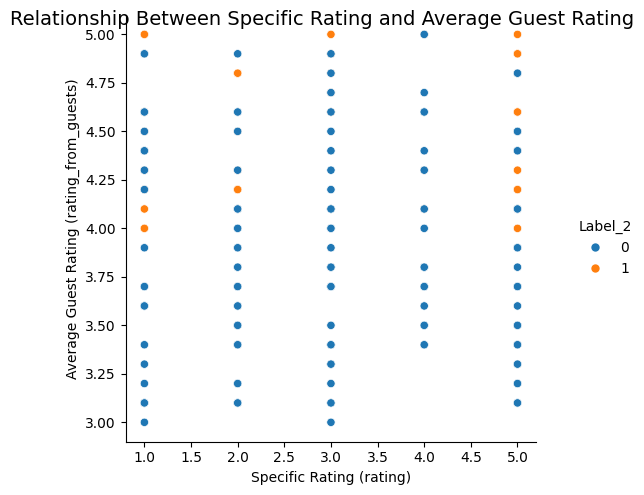

In [ ]:
plot = sns.relplot(data=df, x='rating', y='rating_from_guests', hue='label_2')

# הוספת כותרות
plot.fig.suptitle("Relationship Between Specific Rating and Average Guest Rating", fontsize=14)
plot.set_axis_labels("Specific Rating (rating)", "Average Guest Rating (rating_from_guests)")
plot._legend.set_title("Label_2")

# הצגת הגרף
plt.show()


<div dir='rtl'>

### **ניתוח הקשר בין דירוג אורחים לדירוג ספציפי**  

גרף זה מציג את הקשר הרנדומלי בין **דירוג האורחים** לבין **הדירוג הספציפי**, ומדגים כי אין ערך מהותי להסתמכות על **דירוג ספציפי** כאינדיקציה לאיכות המלון.  
בנוסף, הגרף ממחיש את הקשר שיצרנו בין **label_2** לבין **הדירוג הספציפי**, ומספק ראיה לחיזוק החלטתנו להשתמש ב-label_2 כאומדן איכות אמין יותר.  

</div>


---


In [ ]:
#נרצה להפריד את המתקנים למשתני דמה כדי שנוכל לנתח אותם

# רשימת מתקנים שמעניינים אותנו )
facilities = ['Wi-Fi', 'Spa', 'Swimming Pool', 'Free Parking', 'Restaurant', 'Gym', 'Air Conditioning']

# יצירת עמודות בינאריות לכל מתקן
for facility in facilities:
    column_name = facility.replace(" ", "_")
    df[column_name] = df['hotel_facilities'].str.contains(facility, case=False).astype(int)

# הצגת התוצאה

df.head()


,hotel_name,location,price,review_date,rating,is_luxury_hotel,review,distance_from_city_center,check_in_time,check_out_time,...,label,label_2,labels_different,Wi-Fi,Spa,Swimming_Pool,Free_Parking,Restaurant,Gym,Air_Conditioning
0,Seaside Luxury Suites,New York,250.51,2024-02-07,5,1,Very disappointing stay at Seaside Luxury Suit...,3051,13:0,10:30,...,1,1,False,1,1,1,0,1,1,1
1,Ocean Breeze Resort,Tel Aviv,207.43,2024-08-23,5,1,Stay at Ocean Breeze Resort in Tel Aviv was ok...,1839,12:45,11:0,...,1,1,False,1,1,0,1,1,1,1
2,Mountain View Inn,Berlin,249.67,2024-08-20,5,1,Very disappointing stay at Mountain View Inn i...,4934,15:0,10:0,...,1,0,True,1,1,1,1,1,0,0
3,Heritage Grand Hotel,Rome,427.39,2024-01-01,3,1,Had an amazing stay at Heritage Grand Hotel in...,2093,14:0,11:0,...,0,1,True,1,0,1,1,1,0,1
4,Sunset Beach Resort,Berlin,347.75,2024-10-24,1,1,Stay at Sunset Beach Resort in Berlin was okay...,3592,12:0,11:0,...,0,1,True,1,1,1,1,1,1,0


# שלב ניתוח תגובות

נייבא כלים שמתנתחים טקסט  חופשי: vader משיעור 12


In [ ]:
!pip install vaderSentiment
!pip install wordcloud
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.8 MB/s eta 0:00:00


In [ ]:
texts = df['review']
texts
#נסתכל על התגובות

,review
0,Very disappointing stay at Seaside Luxury Suit...
1,Stay at Ocean Breeze Resort in Tel Aviv was ok...
2,Very disappointing stay at Mountain View Inn i...
3,Had an amazing stay at Heritage Grand Hotel in...
4,Stay at Sunset Beach Resort in Berlin was okay...
...,...
183,Stay at Imperial Heights Hotel in Rome was oka...
184,Very disappointing stay at Sunset Beach Resort...
185,Had an amazing stay at Royal Park Hotel in Dub...
186,Very disappointing stay at The Grand Palace in...


In [ ]:
#נשתמש בכלים לניתוח טקטס כדי לנתח את הביקורות לכל מלון
analyzer = SentimentIntensityAnalyzer()  # יצירת אובייקט ניתוח תחושות עם VADER

def analyze_sentiment_vader(texts):
    sentiments = []  # יצירת רשימה חדשה שתכיל את התחושות
    for text in texts:  # לולאה על כל טקסט בעמודת הטקסט
        score = analyzer.polarity_scores(text)  # קבלת הסקורים של התחושה בעזרת VADER
        # ניתוח תחושה: חיובי אם ה-compound חיובי, שלילי אם הוא שלילי, ניטרלי אחרת
        sentiment = "positive" if score['compound'] > 0.3 else "negative" if score['compound'] < -0.3 else "neutral"
        sentiments.append(sentiment)  # הוספת התחושה לרשימה
    return sentiments  # החזרת הרשימה עם התחושות
    # ניתוח תחושות בעזרת VADER
sentiments_vader = analyze_sentiment_vader(texts)
# הוספת תוצאות ניתוח תחושות לעמודה חדשה ב-DataFrame
df['Sentiment_VADER'] = sentiments_vader
df.head()

,hotel_name,location,price,review_date,rating,is_luxury_hotel,review,distance_from_city_center,check_in_time,check_out_time,...,label_2,labels_different,Wi-Fi,Spa,Swimming_Pool,Free_Parking,Restaurant,Gym,Air_Conditioning,Sentiment_VADER
0,Seaside Luxury Suites,New York,250.51,2024-02-07,5,1,Very disappointing stay at Seaside Luxury Suit...,3051,13:0,10:30,...,1,False,1,1,1,0,1,1,1,negative
1,Ocean Breeze Resort,Tel Aviv,207.43,2024-08-23,5,1,Stay at Ocean Breeze Resort in Tel Aviv was ok...,1839,12:45,11:0,...,1,False,1,1,0,1,1,1,1,neutral
2,Mountain View Inn,Berlin,249.67,2024-08-20,5,1,Very disappointing stay at Mountain View Inn i...,4934,15:0,10:0,...,0,True,1,1,1,1,1,0,0,negative
3,Heritage Grand Hotel,Rome,427.39,2024-01-01,3,1,Had an amazing stay at Heritage Grand Hotel in...,2093,14:0,11:0,...,1,True,1,0,1,1,1,0,1,positive
4,Sunset Beach Resort,Berlin,347.75,2024-10-24,1,1,Stay at Sunset Beach Resort in Berlin was okay...,3592,12:0,11:0,...,1,True,1,1,1,1,1,1,0,neutral


# אנליזה סמנטית -חקירת הקשר בין הרגשות שגילינו בתגובות של האנשים לביקור במלון לבין משתנים מסבירים נוספים

Text(0.5, 0, 'Sentiment_VADER')

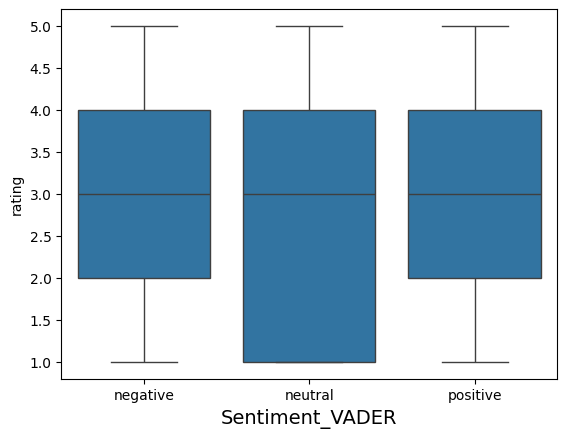

In [ ]:
ax = sns.boxplot(data=df, x='Sentiment_VADER', y='rating')
plt.xlabel('Sentiment_VADER', fontsize=14)


<div dir='rtl'>

# **ניתוח הקשר בין הביקורות המילוליות לדירוג הכללי**  

בהתבסס על הגרף, ניתן לראות כי **אין קשר חזק בין הביקורות המילוליות (`Sentiment_VADER`) לבין דירוג המלון (`rating`)**.  

### **אפשריות להסבר התופעה:**
1. **שוני תרבותי באופן מתן דירוגים** – ייתכן שבכל מדינה נהוג לדרג מלונות בצורה שונה, ללא תלות בניסוח הביקורת.
2. **מקור הנתונים של הביקורות** – אם הביקורות המילוליות **נכתבו על ידי מודל AI (כגון ChatGPT)**, הן עשויות להיות **גנריות ולא משקפות באמת את תחושת המבקרים**.
3. **הפרדה בין הטקסט לדירוג בפועל** – ייתכן שמשתמשים מעניקים דירוג **שאינו תלוי בתוכן הביקורת המילולית**, אלא מתבסס על ציפיות אישיות או פרמטרים אחרים.

</div>


<ipython-input-44-6f458a799cc1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df[df['location'].isin(['Tel Aviv', 'Dubai', 'Jerusalem'])],


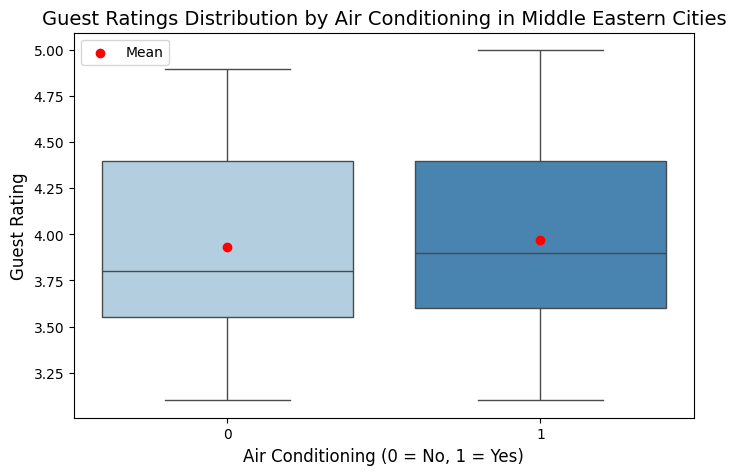

In [ ]:

# יצירת גרף Boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(data=df[df['location'].isin(['Tel Aviv', 'Dubai', 'Jerusalem'])],
            x='Air_Conditioning', y='rating_from_guests', palette="Blues")

# חישוב הממוצע והוספתו כנקודה
means = df[df['location'].isin(['Tel Aviv', 'Dubai', 'Jerusalem'])].groupby('Air_Conditioning')['rating_from_guests'].mean()
for i, mean in enumerate(means):
    plt.scatter(i, mean, color='red', label='Mean' if i == 0 else "", zorder=3)

#הוספת כותרות
plt.title("Guest Ratings Distribution by Air Conditioning in Middle Eastern Cities", fontsize=14)
plt.xlabel("Air Conditioning (0 = No, 1 = Yes)", fontsize=12)
plt.ylabel("Guest Rating", fontsize=12)
plt.legend()

<div dir='rtl'>
בניגוד למה שחשבנו
לא ניתן לזהות מגמה ברורה בין קיומו של מזגן לדירוג גבוה, גם ההבדלים הקטנים בין מזגן לאי מזגן נראה שנובעים מכמות הדאטה הקטנה והשונות בתוך דירוגי המלונות ללא קשר במזגן.  

</div>

<ipython-input-45-6ba9c58145f1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df[df['location'].isin(['Tel Aviv', 'Dubai', 'Jerusalem'])],


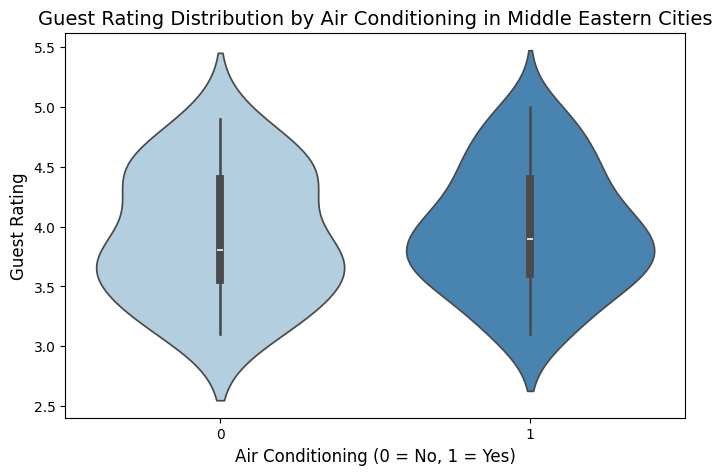

In [ ]:
plt.figure(figsize=(8, 5))
sns.violinplot(data=df[df['location'].isin(['Tel Aviv', 'Dubai', 'Jerusalem'])],
               x='Air_Conditioning', y='rating_from_guests', palette="Blues")

plt.title("Guest Rating Distribution by Air Conditioning in Middle Eastern Cities", fontsize=14)
plt.xlabel("Air Conditioning (0 = No, 1 = Yes)", fontsize=12)
plt.ylabel("Guest Rating", fontsize=12)

plt.show()


<div dir='rtl'>
לא נראה שקיים קשר מובהק בין השימוש במזגן לבין דירוג הערים החמות במזרח התיכון. חוסר קשר זה מעורר ספק לגבי אמינות הדאטה והאם נאסף מאנשים שבאמת חיו באזור זה.
</div>


## גרפים נוספים שלא קשורים לרגשות ומסקנות אחרונות לפני הרגרסיה #

---





Text(0.5, 0, 'label2')

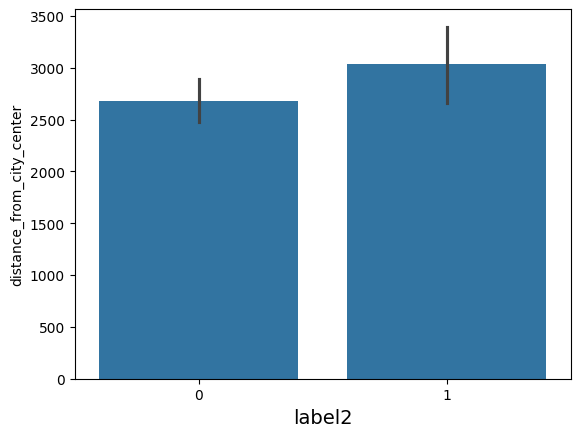

In [ ]:
ax = sns.barplot(data=df, x='label_2', y='distance_from_city_center')
plt.xlabel('label2', fontsize=14)

אין קשר בין המרחק ממרכז העיר ללייבל כלומר למלונות יוקרה שכן ריזורטים נוטים להיות רחוקים ממרכז העיר אך גם בתי הארחה עם כוכב אחד בלבד,לא נראה שבהכרח קיימת מגמה




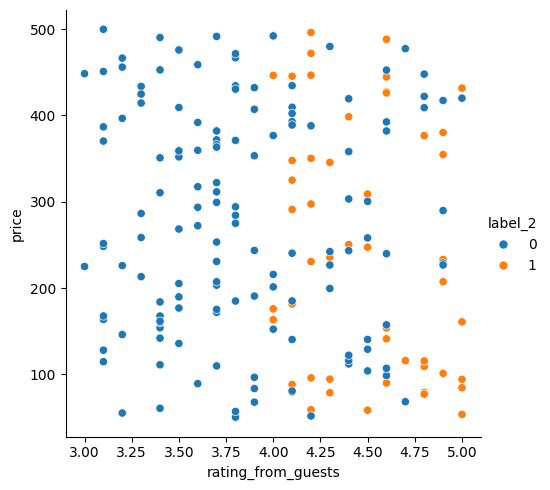

In [ ]:
sns.relplot(data=df, x='rating_from_guests', y='price', hue='label_2')

<div dir='rtl'>

### **ניתוח מלונות יוקרה וטווחי מחירים**

מהגרף ניתן לראות כי מלונות יוקרה עם לקוחות מרוצים (`label_2`) מופיעים בטווחי מחירים מגוונים, ללא מגמה ברורה. עם זאת, נתון מרכזי חסר בנתונים – **כמות האנשים שעבורם בוצעה ההזמנה**.

הפרש המחיר בין חדר זוגי לבין חדר למשפחה של שבעה אנשים עשוי להיות משמעותי, אך אינו בהכרח משקף את דירוג המלון עצמו. לכן, בתרגיל זה, לא ניתן לבחון קשרים בין מחיר למאפיינים אחרים, מאחר שהנתונים אינם כוללים מידע על סוג החדר או מספר האורחים.

</div>

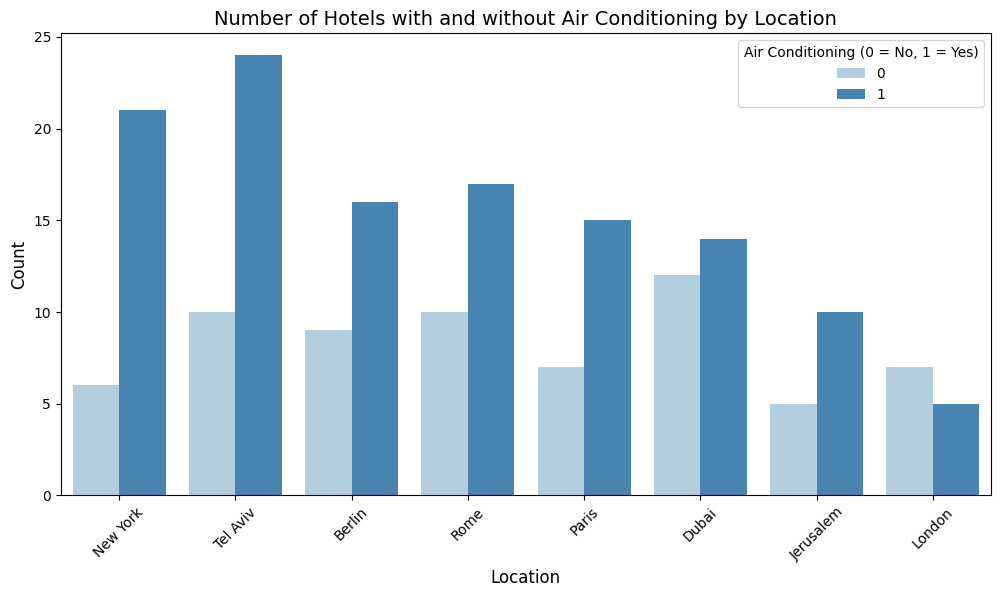

In [ ]:
# Create count plot with blue shades
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='location', hue='Air_Conditioning', palette="Blues")

# Add titles and labels in English
plt.title("Number of Hotels with and without Air Conditioning by Location", fontsize=14)
plt.xlabel("Location", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)  # Rotate long category names
plt.legend(title="Air Conditioning (0 = No, 1 = Yes)")

# Show the plot
plt.show()

<div dir='rtl'>

### **ניתוח נפוצות המזגן בערים שונות**

לאחר שהבנו כי קיומו של מזגן אינו משפיע על דירוג האורחים, ביקשנו לבדוק האם ישנן ערים שבהן הוא נפוץ יותר.

במקום להתייחס למספר האבסולוטי של מלונות עם ובלי מזגן, נבחן את ההפרש היחסי בין מספר המלונות בכל עיר הכוללים מזגן לבין אלו שאינם כוללים מזגן, מאחר שכל עיר מכילה מספר שונה של מלונות.

מהנתונים ניתן לראות כי בתל אביב, ניו יורק, פריז וירושלים קיים הפרש משמעותי לטובת מלונות עם מזגן. בהנחה שהנתונים מייצגים את כלל המלונות בעולם, ניתן להסיק כי בערים אלו שיעור המלונות הכוללים מזגן גבוה משמעותית בהשוואה לערים אחרות.

</div>



# **נסתכל על הדאטה בהיבט של קשרים כדי לראות שלא פיספנו משהו מעניין **

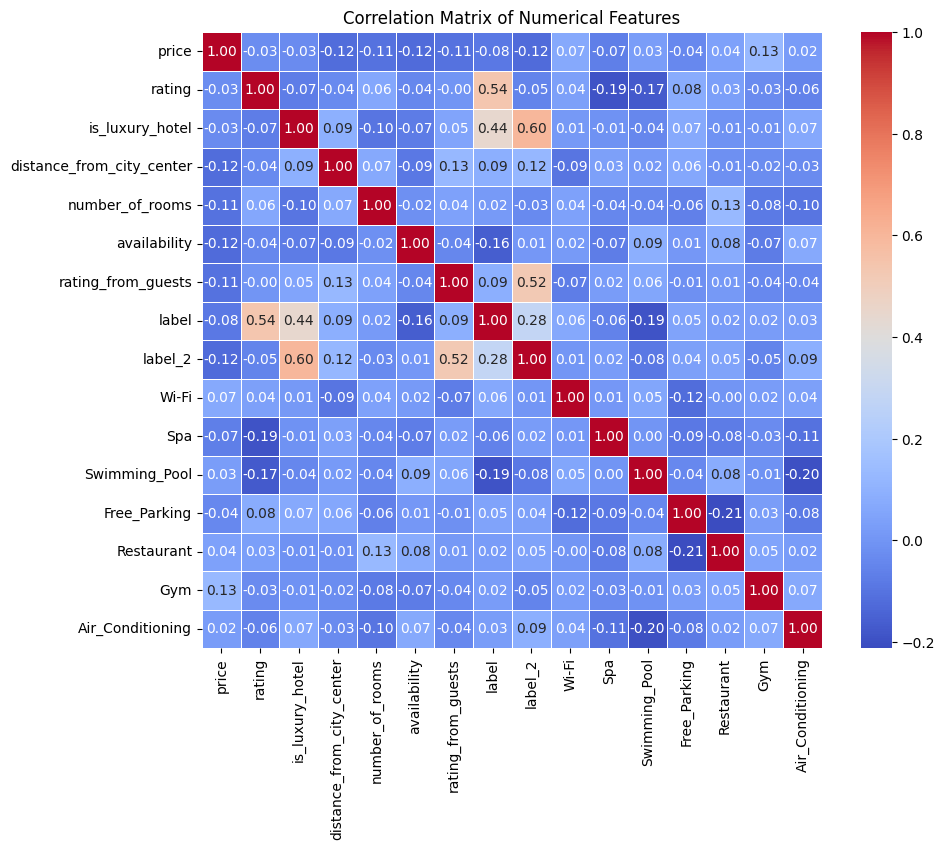

In [ ]:
# חישוב מטריצת המתאמים בין המשתנים המספריים
# Select only numerical columns before calculating correlation
numerical_df = df1.select_dtypes(include=['number'])
correlation_matrix = numerical_df.corr()

# הצגת מטריצת הקורלציות עם מפה חמה (heatmap)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Numerical Features")
plt.show()

# סידור ועדכון דאטה

In [ ]:
# המרת משתנים קטגוריאליים לעמודות דמוי-בינאריות
df1 = pd.get_dummies(df, columns=['Sentiment_VADER'], drop_first=True)

<div dir='rtl'>

# הסבר על מחיקת משתנים מהניתוח  

### 1. `review_date` – תאריך כתיבת הביקורת  
תאריך הביקורת **אינו תורם ישירות לניתוח היוקרה**, והוא עשוי להיות מושפע מגורמים חיצוניים כגון עונתיות או מגמות תקופתיות שלא רלוונטיות למודל.  

---

### 2. `check_in_time`, `check_out_time` – זמני הצ'ק-אין והצ'ק-אאוט  
גם אם יש למשתנה זה השפעה מסוימת, היא תלויה **בסוג המלון** (מלון עסקים מול מלון נופש), אך אין לנו מידע מדויק שמאפשר להבדיל בין שני סוגי המלונות.  
בנוסף, **שעות הצ'ק-אין והצ'ק-אאוט אידיאליות משתנות בין תרבויות**, ולכן המשתנה עלול להטעות.  

---

### 3. `hotel_name` – שם המלון  
תחילה שקלנו להסיר משתנה זה, אך החלטנו **להשאיר אותו בניתוח, יהיה מעניין לראות אם שם המלון שמייצג בעצם רשתות של מלונות משפיע**.  

---

### 4. `location` – מיקום המלון (עיר)  
מיקום המלון לא משנה את רמת היוקרה של המלון לא בגלל שהוא לא גורם משפיע אלא בגלל שיש לנו מעט מאוד דאטה בכל לוקיישן ולכן לא נוכל להסיק מסקנות לפי משתנה זה.  

---

### 5. `distance_from_city_center` – מרחק ממרכז העיר  
מרחק ממרכז העיר **אינו מדד ישיר ליוקרה**, שכן יש ריזורטים יוקרתיים מחוץ לעיר וגם מלונות פשוטים במרכז העיר.  
השארתו עלולה לגרום להטיה במודל, ולכן הוחלט להסירו.  

---

### 6. `availability` – זמינות חדרים  
משתנה **תלוי עונתיות ואקראיות**, ולכן אינו משקף את רמת היוקרה של המלון.  
ייתכן שבתקופות מסוימות מלונות יוקרתיים יהיו מלאים ובתקופות אחרות פנויים, ללא קשר לאיכותם.  

---

### 7. `Sentiment_VADER` – מדד סנטימנט מהביקורות  
משתנה זה הומר **למשתנה דאמי**, ולכן אין צורך במשתנה המקורי.  

---

### 8. `Sentiment_VADER_neutral`, `Sentiment_VADER_positive` – סנטימנט חיובי ונייטרלי מהביקורות  
משתנים אלה **מבוססים על תגובות בודדות ולא משקפים מגמה**, ולכן הוחלט להסירם מהמודל.  
כיוון שהסקירות עשויות להיות מוטות ואינן בהכרח משקפות את איכות המלון, עדיף להתמקד במשתנים יציבים ואובייקטיביים יותר.  

---

### 9. `hotel_facilities` – מתקני המלון  
משתנה זה הומר **למשתנים דאמיים**, ולכן אין צורך במקור.  

---

### 10. `review` – תוכן הביקורת  
ניתחנו את המשתנה והמרנו אותו **לדאמיים**, ולכן אין צורך לשמור את הטקסט החופשי במודל.  

---

### 11. `is_luxury_hotel`, `label` – משתני סיווג יוקרה מקוריים  
כיוון שאנחנו מפתחים מדד **חדש ומדויק יותר ליוקרה (`label_2`)**, אין צורך להסתמך על המשתנים הללו שעלולים להיות מוטים או לא מוגדרים היטב.  

---

### 12. `rating` – דירוג פרטני של ביקורת  
המשתנה `rating` הוא **דירוג שניתן לביקורת אחת ספציפית**, ואינו משקף את איכות המלון באופן כללי.  
במקום זאת, אנו משתמשים **ב`rating_from_guests`**, המייצג דירוג ממוצע המבוסס על חוות דעת רבות.  

---

### 13. `price` – מחיר החדר  
החלטנו **להסיר את משתנה המחיר**, מכיוון **שלא ידוע לנו כמה אנשים כלולים בהזמנה או גודל החדר**.  
לכן, המחיר עשוי להשתנות באופן שאינו משקף את רמת היוקרה האמיתית של המלון.  

---

### **מסקנה**  
משתנים אלה **אינם תורמים ישירות לניתוח היוקרה של המלון**, ולכן נמחקים על מנת ליצור מודל נקי ומדויק יותר.

</div>


In [ ]:
print(df1.columns)


Index(['hotel_name', 'location', 'price', 'review_date', 'rating',
       'is_luxury_hotel', 'review', 'distance_from_city_center',
       'check_in_time', 'check_out_time', 'number_of_rooms', 'availability',
       'rating_from_guests', 'hotel_facilities', 'label', 'label_2',
       'labels_different', 'Wi-Fi', 'Spa', 'Swimming_Pool', 'Free_Parking',
       'Restaurant', 'Gym', 'Air_Conditioning', 'Sentiment_VADER_neutral',
       'Sentiment_VADER_positive'],
      dtype='object')


In [ ]:

# רשימת העמודות למחיקה
columns_to_drop = [
    "review_date",
    "check_in_time",
    "check_out_time",
    "location",
    "distance_from_city_center",
    "availability",
    "Sentiment_VADER",
    "hotel_facilities",
    "review",
    "is_luxury_hotel",
    "label",
    "price",
   "labels_different",
    "rating",
    "Sentiment_VADER_neutral",
    "Sentiment_VADER_positive"
]

# ביצוע מחיקה של העמודות
df_clean_t = df1.drop(columns=columns_to_drop, errors="ignore")

print(df_clean.columns)

Index(['hotel_name', 'location', 'price', 'review_date', 'rating',
       'is_luxury_hotel', 'review', 'distance_from_city_center',
       'check_in_time', 'check_out_time', 'number_of_rooms', 'availability',
       'rating_from_guests', 'hotel_facilities', 'label', 'label_2',
       'labels_different', 'Wi-Fi', 'Spa', 'Swimming_Pool', 'Free_Parking',
       'Restaurant', 'Gym', 'Air_Conditioning', 'Sentiment_VADER'],
      dtype='object')


In [ ]:
df_clean = pd.get_dummies(df_clean_t, columns=['hotel_name'], drop_first=True)


In [ ]:
df_clean.head()

,number_of_rooms,rating_from_guests,label_2,Wi-Fi,Spa,Swimming_Pool,Free_Parking,Restaurant,Gym,Air_Conditioning,...,hotel_name_Luxe Hotel & Spa,hotel_name_Mountain View Inn,hotel_name_Ocean Breeze Resort,hotel_name_Royal Park Hotel,hotel_name_Seaside Luxury Suites,hotel_name_Skyline Retreat,hotel_name_Sunset Beach Resort,hotel_name_The Grand Palace,hotel_name_The Ritz Plaza,hotel_name_Urban Escape Hotel
0,43,4.4,1,1,1,1,0,1,1,1,...,False,False,False,False,True,False,False,False,False,False
1,114,4.9,1,1,1,0,1,1,1,1,...,False,False,True,False,False,False,False,False,False,False
2,152,3.1,0,1,1,1,1,1,0,0,...,False,True,False,False,False,False,False,False,False,False
3,55,4.6,1,1,0,1,1,1,0,1,...,False,False,False,False,False,False,False,False,False,False
4,188,4.1,1,1,1,1,1,1,1,0,...,False,False,False,False,False,False,True,False,False,False


#רגרסיה

In [ ]:
# בחירת המשתנים הרלוונטיים ל-X
X = df_clean[['number_of_rooms', 'rating_from_guests',
    'Wi-Fi', 'Spa', 'Swimming_Pool', 'Free_Parking', 'Restaurant', 'Gym',
    'Air_Conditioning']]
# בחירת המשתנה התלוי (y)
y = df_clean['label_2']

In [ ]:
# בדיקת התפלגות הערכים במשתנה שאנחנו חוזים
y.value_counts()

,count
label_2,
0,138
1,50


In [ ]:
# המטרה העיקרית של הפיצול היא להעריך את ביצועי המודל בצורה אובייקטיבית
# על ידי שימוש בנתונים שלא השתמשנו בהם במהלך האימון של המודל.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# יצירת המודל
model = LogisticRegression()

In [ ]:
# CV ביצוע
# מחלקים את הנתונים ל-5 מקטעים
# בכל פעם כל מקטע משמש כקבוצת בדיקה ושאר הנתונים משמשים לאימון המודל
# הפונקציה מחזירה את הניקוד של המודל עבור כל מקטע ואז מחשבים את הניקוד הממוצע
cv_scores = cross_val_score(model, X, y, cv=5)
# הצגת התוצאות
print(f"Cross-Validation Scores (5-fold): {cv_scores}")
print(f"Average CV Accuracy: {np.mean(cv_scores) * 100:.2f}%")

Cross-Validation Scores (5-fold): [0.86842105 0.81578947 0.71052632 0.59459459 0.75675676]
Average CV Accuracy: 74.92%


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [ ]:

model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# חיזוי תוצאות על הדטהסט לבדיקה
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0])

In [ ]:
# הערכת המודל
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
#הסתייגות קלה ,האיזון בין אמת לשקר במשתנה המוסבר לא קיים ולכן המודל מוטה כלפי 0 לעומת 1

Accuracy: 78.95%


In [ ]:
# הצגת מטריצת בלבול
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[25  2]
 [ 6  5]]


In [ ]:
# חישוב מטריצת הבלבול
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# חישוב סך הכל דוגמאות בסט הבדיקה
total = tn + fp + fn + tp

# הדפסת הערכים בנפרד
print(f"True Positive (TP): {tp / total * 100:.2f}%")
print(f"False Positive (FP): {fp / total * 100:.2f}%")
print(f"False Negative (FN): {fn / total * 100:.2f}%")
print(f"True Negative (TN): {tn / total * 100:.2f}%")

True Positive (TP): 13.16%
False Positive (FP): 5.26%
False Negative (FN): 15.79%
True Negative (TN): 65.79%


:נעזרנו בצאט על מנת  לבדוק אם אפשר להוריד דברים מהרגרסיה באמצעות מקדמים אבסולטיים ABS_COEFFICIENT

In [ ]:

# שליפת המקדמים של המשתנים
feature_importance = pd.DataFrame({
    "Feature": X_train.columns,
    "Coefficient": model.coef_[0]
})

# מיון לפי ערך האבסולוטי של ההשפעה
feature_importance["Abs_Coefficient"] = np.abs(feature_importance["Coefficient"])
feature_importance = feature_importance.sort_values(by="Abs_Coefficient", ascending=False)

# הצגת המקדמים
print(feature_importance)

              Feature  Coefficient  Abs_Coefficient
1  rating_from_guests     2.318235         2.318235
2               Wi-Fi     0.663434         0.663434
4       Swimming_Pool    -0.631921         0.631921
6          Restaurant     0.529054         0.529054
5        Free_Parking     0.394347         0.394347
3                 Spa     0.195243         0.195243
8    Air_Conditioning     0.193925         0.193925
7                 Gym    -0.114897         0.114897
0     number_of_rooms    -0.004510         0.004510


<div dir="rtl" style="text-align: right;">

# ניתוח התוצאות – מהם המאפיינים של מלון יוקרתי עם דירוג טוב (label_2)?

המודל בוחן אילו תכונות מאפיינות מלונות יוקרתיים עם דירוג גבוה (label_2).
עם זאת, חשוב לציין שרוב הקשרים אינם חזקים במיוחד, ולכן יש להתייחס לתוצאות בזהירות.

## המשתנה הדומיננטי ביותר
rating_from_guests (2.32) – המשתנה המשפיע ביותר, כפי שצפינו מראש, מכיוון ש- label_2 מבוסס על דירוגי אורחים.

## מאפיינים שמגבירים את הסיכוי למלון יוקרתי עם דירוג גבוה
- **Wi-Fi (0.66)** – חיבור אינטרנט איכותי נתפס כחשוב, בעיקר במלונות עסקיים.
- **Restaurant (0.53)** – מסעדה במלון משפרת את החוויה ותורמת לדירוג גבוה.
- **Free_Parking (0.39)** – חניה חינם נוחה, במיוחד במרכזי ערים.
- **Air_Conditioning (0.19)** – משפר את שביעות הרצון, אך ההשפעה מתונה.
- **Spa (0.19)** – נתפס כמאפיין יוקרתי, אך אינו גורם קריטי לדירוג גבוה.

## מאפיינים שעלולים דווקא להוריד את הדירוג
- **Swimming_Pool (-0.63)** – באופן מפתיע, בריכה לא בהכרח קשורה ליוקרה ואף יכולה לפגוע בדירוג, אולי בגלל תחזוקה לקויה או חוסר רלוונטיות למלונות יוקרתיים ורלוונטיות למלונות למשפחות.
- **Gym (-0.11)** – חדר כושר לא נתפס כמאפיין קריטי במלונות יוקרה.
- **number_of_rooms (-0.004)** – גודל המלון כמעט ולא משפיע, מה שמעיד שמלונות קטנים יכולים להיות יוקרתיים כמו גדולים.



<div dir="rtl" style="text-align: right;">

# **ניתוח ביצועי המודל והמלצות לשיפור**

הביצועים של המודל אינם מדויקים ממגוון סיבות.  
**ראשית**, המודל אינו מאוזן – יש **ייצוג יתר** למלונות שאינם יוקרתיים או למלונות יוקרתיים עם דירוגים נמוכים, לעומת מלונות יוקרתיים עם דירוגים גבוהים.  
**חוסר האיזון הקיצוני** בין סוגי הנתונים מקשה על המודל ללמוד בצורה נכונה, מכיוון שהוא מניח באופן אוטומטי שהסיכוי למלון יוקרה עם דירוג חיובי הוא נמוך.

בנוסף, **איכות הנתונים נמוכה** – יש מעט נתונים, ולפי הניתוח שביצענו, נראה כי הם אינם אותנטיים.  
לדוגמה, **חוסר השפעתו של מזגן** על דירוגי מלונות במזרח התיכון הוא סימן מובהק לכך שהנתונים אינם ריאליים.  
לכן, מומלץ להשתמש **בנתונים אמיתיים ומאוזנים**, או לבצע מניפולציות על הנתונים הקיימים כדי לאזן אותם.

## **מסקנות מהאנליזה הסמנטית**
בניתוח הגרפי נמצא כי **אין קשר מובהק** בין דירוג ספציפי של אורח לבין התגובה שלו.  
הדיון המפורט בנושא נמצא מתחת לגרף 3, אך המסקנה הכללית היא שהתוצאות שהתקבלו **אינן בעלות משמעות ממשית**.

## **סוגיות אתיות**
קיימות **השלכות אתיות** לשימוש במודל זה – הוא עלול **להטעות עסקים** שמתכננים להקים מלונות יוקרה בהתבסס על כמות קטנה של נתונים לא מדויקים.  
לכן, אנו ממליצות להעשיר את המודל **בלפחות 10,000 ביקורות**, ואף יותר, בהתחשב בכמות המלונות הגדולה שנכללת בניתוח.

## **מגבלות הנתונים והניתוח**
- **כמות הנתונים אינה מספיקה.**  
- **נאלצנו להסיר נתונים רבים** עקב כפילויות .  
- **חסרים נתונים משמעותיים** שהיו יכולים לספק הבנה עמוקה יותר של השפעת המשתנים על המחיר, כגון:  
  - **כמות האנשים בחדר**  
  - **סוג החדר**  
  - **האם האירוח כולל ארוחות**  
  - **האם המחיר כולל שירותים נוספים כמו ספא או רום סרוויס**  
  מידע זה היה מאפשר לנו לנתח בצורה מעמיקה יותר את המשתנים המשפיעים על מחיר המלון.  
- **ברגרסיה, המשתנה המשמעותי ביותר היה דירוג האורחים הממוצע מהאתר**, אך ידענו זאת מראש.  
  הממצאים ככלל **מושפעים מהטיות** שונות כמו חוסר איזון של הנתונים.

## **המלצות להמשך**
לצורך **ניתוח פרקטי ומדויק יותר**, יש צורך **באיסוף נתונים נוספים**.  
בנוסף, נרצה לחקור **כיצד מסעדות וספא במלונות משפיעים על זמינות חניה חינם**, וכיצד נתון זה משפיע על חוות הדעת.  
כמו כן, נרצה לבדוק האם גורמים אלה יכולים להעיד על **יוקרתו של המלון**.

</div>





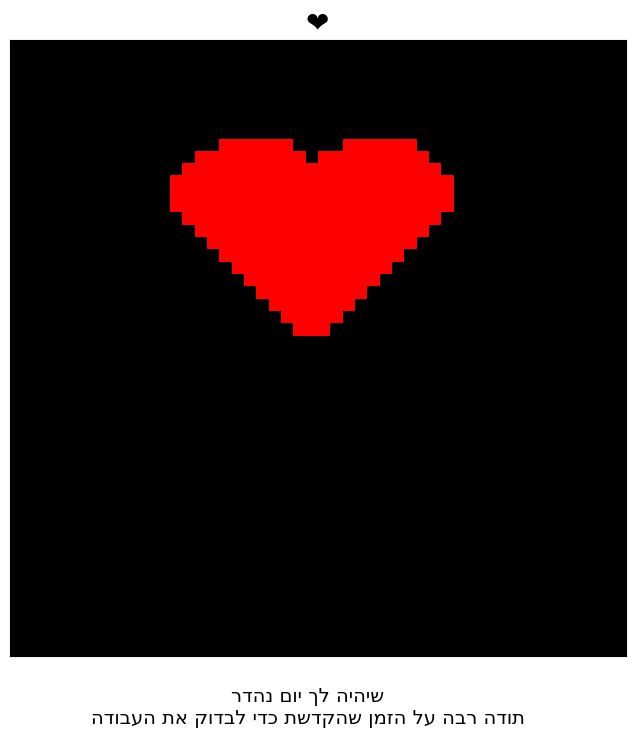

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm


# Create an empty canvas
canvas_size = 50
canvas = np.zeros((canvas_size, canvas_size, 3), dtype=np.uint8)

# Define the heart shape using a pixel map
heart_shape = [
    "0000011111100001111110000",
    "0001111111110111111111000",
    "0011111111111111111111100",
    "0111111111111111111111110",
    "0111111111111111111111110",
    "0111111111111111111111110",
    "0011111111111111111111100",
    "0001111111111111111111000",
    "0000111111111111111110000",
    "0000011111111111111100000",
    "0000001111111111111000000",
    "0000000111111111110000000",
    "0000000011111111100000000",
    "0000000001111111000000000",
    "0000000000111110000000000",
    "0000000000011100000000000",
]

# Convert the heart shape to pixel coordinates
heart_array = np.array([[int(pixel) for pixel in row] for row in heart_shape])
heart_height, heart_width = heart_array.shape

# Center the heart on the canvas
start_x = (canvas_size - heart_width) // 2
start_y = (canvas_size - heart_height) // 4

# Draw the heart in red
for i in range(heart_height):
    for j in range(heart_width):
        if heart_array[i, j] == 1:
            canvas[start_y + i, start_x + j] = [255, 0, 0]  # Red

# Display the heart with properly aligned Hebrew text
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(canvas)
ax.set_xticks([])
ax.set_yticks([])
ax.set_title("❤️", fontsize=20)

# Hebrew text
hebrew_text = "תודה רבה על הזמן שהקדשת כדי לבדוק את העבודה\nשיהיה לך יום נהדר"


# Add the text properly aligned
plt.figtext(0.5, 0.02, hebrew_text[::-1], fontsize=14, ha="center", va="bottom", color="black", wrap=True, )

# Show the plot
plt.show()
